# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

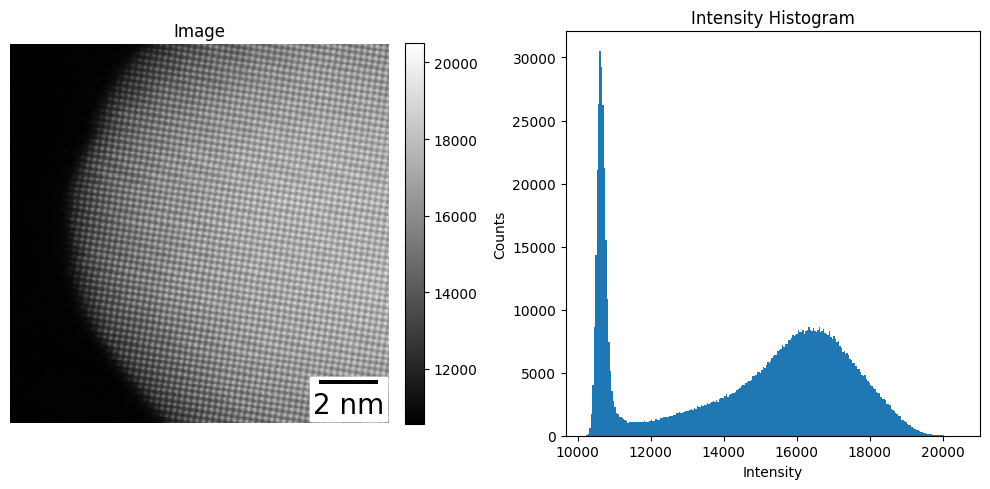

In [1]:
import matplotlib.pyplot as plt

import qem

legacyStatSTEM = qem.io.read_legacyInputStatSTEM('../data/Au/Example_Au.mat')
image = legacyStatSTEM['input']['obs']
dx = legacyStatSTEM['input']['dx']
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']

input_coordinates = inputStatSTEM['coordinates']
output_coordinates = outputStatSTEM['coordinates']
input_coordinates[:,1] = input_coordinates[:,1]/dx
input_coordinates[:,0] = input_coordinates[:,0]/dx
from qem.image_fitting import ImageFitting

model=ImageFitting(image, dx=dx, elements=['Au'])
model.import_coordinates(input_coordinates -1)
model.plot()

In [2]:
model.fit_background = True
model.same_width =True
model.model_type = 'gaussian'
params = model.init_params()
params = model.linear_estimator(params)
model.prediction = model.predict(local=True)
# model.fit_global(params, maxiter=1000, tol = 1e-6, verbose=True)
model.fit_stochastic(params, maxiter=50, tol =1e-3,batch_size=3000, num_epoch=2, verbose=1, step_size=0.1, plot=False)
# model.fit_voronoi(params=params)


Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 1061.4504
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 989.0649
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 973.1479
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 944.4160
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 915.6073
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 902.7385
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 899.0622
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 890.6941
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 877.5493
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 866.9730
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 862.5031
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 859.9885
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 854.4273
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 846.8790
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 841.5542
Ep

Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 779.5878
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 770.2338
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 773.0658
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 760.3934
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 760.2052
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 765.9711
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 763.8230
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 758.3566
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 757.6930
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 760.8102
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 761.2519
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 758.4447
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 756.6135
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 757.6345
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 758.9706
Epo

Fitting random batch: 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]
INFO:root:Convergence rate for pos_x = 1.89306640625
INFO:root:Convergence not reached


{'pos_x': tensor([ 157.3393,  159.8856,  159.6800,  ..., 1023.0000, 1020.9372,
          218.5193], device='mps:0', grad_fn=<ScatterBackward0>),
 'pos_y': tensor([ 437.3477,  405.8521,  524.6849,  ..., 1007.7846, 1019.5659,
          259.4042], device='mps:0', grad_fn=<ScatterBackward0>),
 'height': tensor([ 915.8914, 1128.0615,  875.4124,  ..., 6258.0762, 4110.7783,
         1011.1516], device='mps:0', grad_fn=<MulBackward0>),
 'width': tensor([5.7267], device='mps:0', grad_fn=<AddBackward0>),
 'background': tensor(10704.0869, device='mps:0')}

In [3]:
model.fit_voronoi()


Fitting cells: 100%|██████████| 2949/2949 [00:01<00:00, 1547.03it/s]
INFO:root:Convergence rate for pos_x = 0.0
INFO:root:Convergence rate for pos_y = 0.0
INFO:root:Convergence rate for height = 0.0
INFO:root:Convergence rate for width = 0.0
INFO:root:Convergence rate for background = 0.0
INFO:root:Convergence reached


{'pos_x': tensor([ 157.3393,  159.8856,  159.6800,  ..., 1023.0000, 1020.9372,
          218.5193], device='mps:0'),
 'pos_y': tensor([ 437.3477,  405.8521,  524.6849,  ..., 1007.7846, 1019.5659,
          259.4042], device='mps:0'),
 'height': tensor([ 915.8914, 1128.0615,  875.4124,  ..., 6258.0762, 4110.7783,
         1011.1516], device='mps:0'),
 'width': tensor([5.7267], device='mps:0'),
 'background': tensor(10704.0869, device='mps:0')}

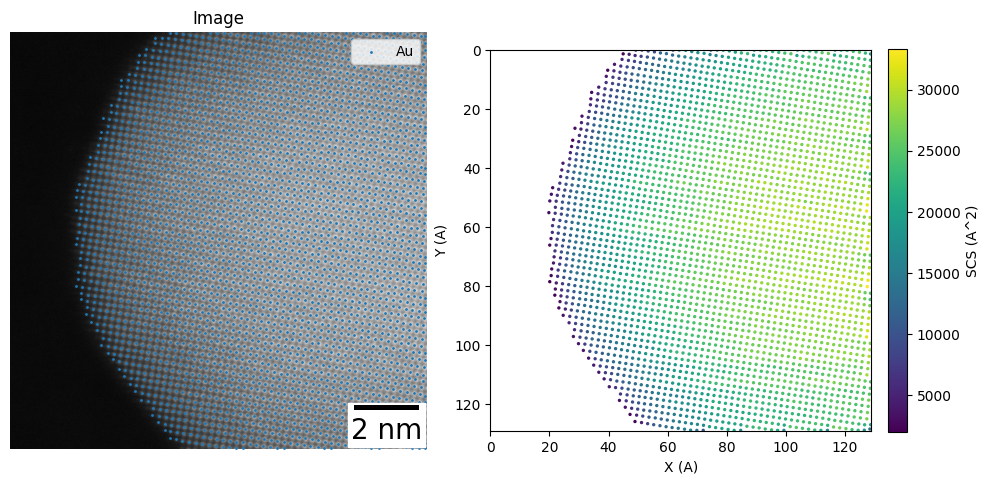

In [4]:
model.plot_scs()

Text(0.5, 1.0, 'Residuals')

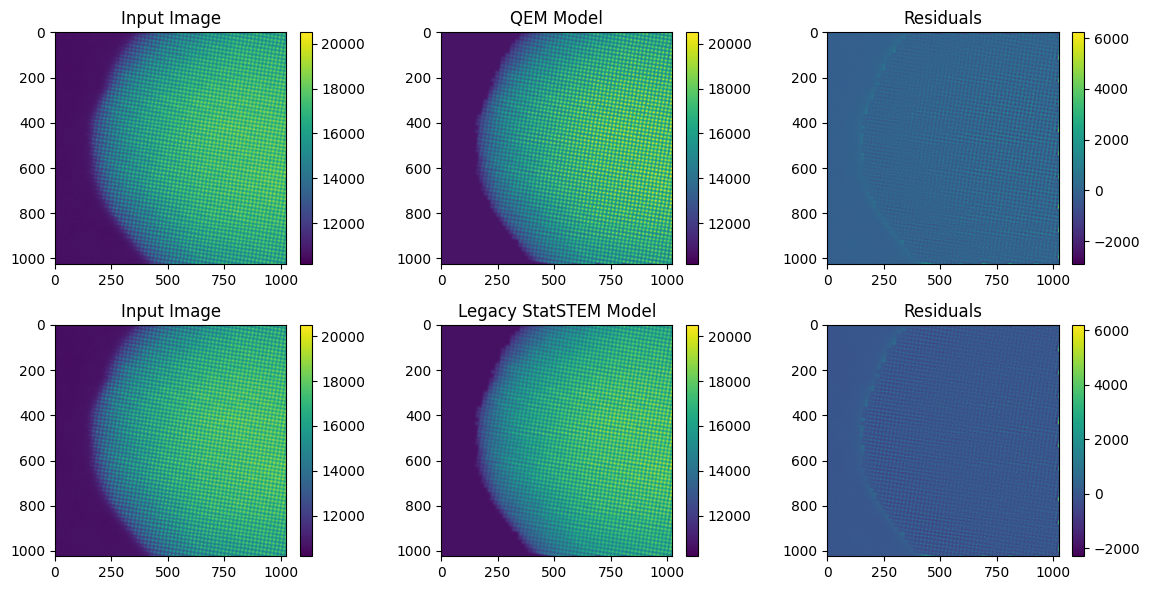

In [5]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,2)
im=plt.imshow(model.prediction)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.tight_layout()
plt.title('QEM Model')

plt.subplot(2,3,3)
diff = model.image - model.prediction
im=plt.imshow(diff)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

plt.subplot(2,3,4)
im=plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())   
plt.tight_layout()
plt.title('Legacy StatSTEM Model')

plt.subplot(2,3,6)
im=plt.imshow(inputStatSTEM['obs']-outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

In [6]:
import numpy as np
from qem.utils import safe_convert_to_numpy
res = model.residual(model.params)
our = np.std(res)
ref = np.std(inputStatSTEM['obs']-outputStatSTEM['model'])

print("QEM residual std: ", our)
print("Legacy StatSTEM residual std: ", ref)


QEM residual std:  479.69342
Legacy StatSTEM residual std:  432.58838752864705


In [8]:
%matplotlib qt
model.estimate_atom_counts_with_gmm(max_components=30)
model.plot_atom_count_map()

Fitting GMM components: 100%|██████████| 30/30 [00:03<00:00,  8.64it/s]
INFO:root:Recommended number of components: 13


Slider changed to: 14
Updating plots for 14 components
Plot update completed
Slider changed to: 21
Updating plots for 21 components
Plot update completed
Slider changed to: 24
Updating plots for 24 components
Plot update completed
Slider changed to: 25
Updating plots for 25 components
Plot update completed
Slider changed to: 27
Updating plots for 27 components
Plot update completed
Slider changed to: 28
Updating plots for 28 components
Plot update completed
Slider changed to: 29
Updating plots for 29 components
Plot update completed
Slider changed to: 28
Updating plots for 28 components
Plot update completed
Slider changed to: 29
Updating plots for 29 components
Plot update completed
Slider changed to: 28
Updating plots for 28 components
Plot update completed
Slider changed to: 29
Updating plots for 29 components
Plot update completed
Slider changed to: 28
Updating plots for 28 components
Plot update completed
Slider changed to: 27
Updating plots for 27 components
Plot update completed